In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5249.jpg         
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         

### Reading the train data

In [2]:
# reading the csv file
data_train = pd.read_csv('train_GenderClassification.csv')

In [3]:
data_train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [4]:
data_train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [5]:
# load images and store it in numpy array

# empty list to store the images
Xtrain = []
# iterating over each image
for img_name_train in data_train.image_names:
    # loading the image using its name
    img_train = plt.imread('images/' + img_name_train)
    # saving each image in the list
    Xtrain.append(img_train)

# converting the list of images into array
Xtrain=np.array(Xtrain)

# storing the target variable in separate variable
ytrain = data_train['class'].values

In [6]:
# shape of the image
Xtrain.shape

(12196, 224, 224, 3)

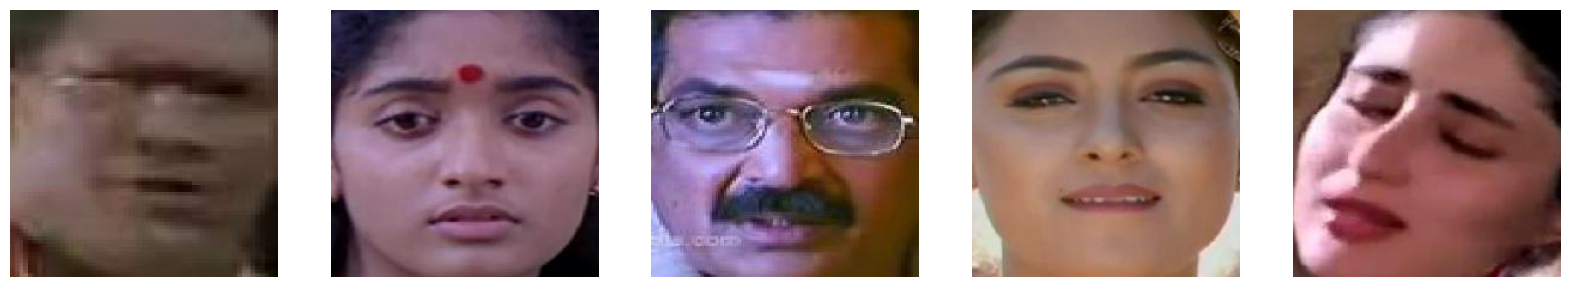

In [7]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(Xtrain[i*400])
    ax[i].axis('off')

### Normalizing the train data

In [8]:
# minimum and maximum pixel values of images
Xtrain.min(), Xtrain.max()

(0, 255)

In [9]:
def normalize_data(data, batch_size=1000):
    for i in range(0, len(data), batch_size):
        data[i:i+batch_size] = data[i:i+batch_size] / np.max(data[i:i+batch_size])
    return data

In [10]:
# normalizing the pixel values
Xtrain = normalize_data(Xtrain.copy())

In [11]:
# minimum and maximum pixel values of images after normalizing
Xtrain.min(), Xtrain.max()

(0, 1)

### Creating Training & Validation dataset

In [12]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(Xtrain, ytrain, test_size=0.25, random_state=42)

In [13]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((9147, 224, 224, 3), (9147,)), ((3049, 224, 224, 3), (3049,)))

In [14]:
!pip install tensorflow

In [15]:
import tensorflow as tf

In [16]:
!pip install scikit-learn

In [17]:
print(tf.__version__)
import keras
print(keras.__version__)

2.16.1
3.3.3


### Image Augmentation using Keras (ImageDataGenerator)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [20]:
image_augmentation.fit(X_train)

### Defining the model architecture

In [21]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dropout, BatchNormalization, Flatten, Conv2D, Flatten, MaxPool2D
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [22]:
# defining the Adam optimizer and setting the learning rate
adam4 = Adam(learning_rate=1e-4)

In [23]:
# defining and compiling the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam4, metrics=['accuracy'])

C:\Users\udmitra\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [24]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 50)        │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 50)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 50)        │          62,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 140450)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │      14,045,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,122,451 (53.87 MB)

 Trainable params: 14,122,051 (53.87 MB)

 Non-trainable params: 400 (1.56 KB)

### Setting up Model Checkpoint

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
# defining the path to store the weights
filepath="best_weights_gender_classification.keras"

# defining the model checkpointing and metric to monitor
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

### Train the model

In [27]:
model_history = model.fit(image_augmentation.flow(X_train, y_train, batch_size=32), validation_data=(X_valid, y_valid), epochs=60, callbacks=[checkpoint])

Epoch 1/60


C:\Users\udmitra\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5104 - loss: 0.8883
Epoch 1: val_loss improved from inf to 0.70182, saving model to best_weights_gender_classification.keras
286/286 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.5104 - loss: 0.8884 - val_accuracy: 0.5139 - val_loss: 0.7018
Epoch 2/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.5111 - loss: 0.8709
Epoch 2: val_loss did not improve from 0.70182
286/286 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.5111 - loss: 0.8709 - val_accuracy: 0.5110 - val_loss: 0.7301
Epoch 3/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.5146 - loss: 0.8559
Epoch 3: val_loss did not improve from 0.70182
286/286 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.5146 - loss: 0.8560 - val_accuracy: 0.5074 - val_loss: 0.7596
Epoch 4/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.5116 - loss: 0.8479
Epoch 4: val_loss did not improve from 0.70182
286/286 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.5115 -

### Evaluating the model's performance

In [47]:
from sklearn.metrics import accuracy_score, f1_score

In [50]:
# loading the best model
model.load_weights("best_weights_gender_classification.keras")

In [51]:
y_train_pred = model.predict(X_train)[:,0]
y_train_pred = np.where(y_train_pred<0.5, 0, 1)

286/286 ━━━━━━━━━━━━━━━━━━━━ 83s 290ms/step


In [52]:
# getting predictions in the form of class as well as probabilities
prediction_probabilities = model.predict(X_valid)[:,0]
predictions = np.where(prediction_probabilities < 0.5, 0, 1)

96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step


In [53]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred), '%')
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Training Accuracy:  0.5250901935060676 %
Accuracy on validation set: 0.5155788783207609 %


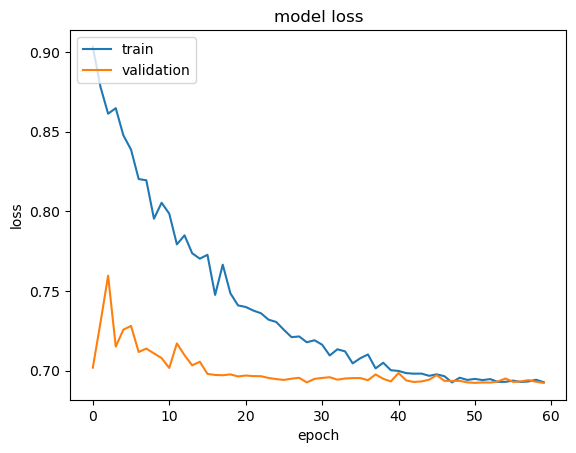

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

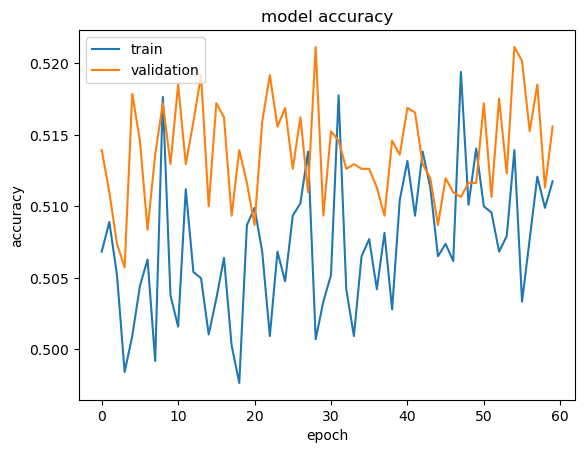

In [33]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 48 % sure
And actual class is  0


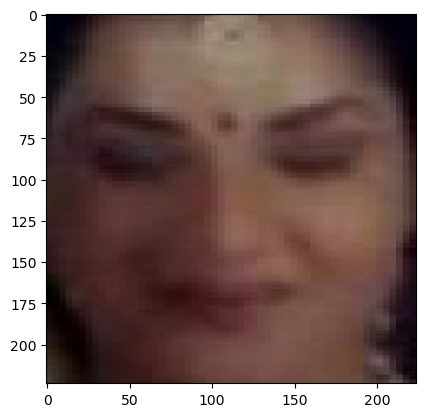

In [49]:
# pull out the original images from the data which correspond to the validation data
_, valid_images, _, valid_y = train_test_split(data_train.image_names.values, data_train['class'].values, test_size=0.25, random_state=42)

# get a random index to plot image randomly
index = np.random.RandomState(42).choice(range(len(valid_images)))

# get the corresponding image name and probability
img_name = valid_images[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

### Reading the test data

In [35]:
# reading the csv file
data_test = pd.read_csv('test_GenderClassification.csv')

In [36]:
data_test.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [37]:
# load images and store it in numpy array

# empty list to store the images
Xtest = []
# iterating over each image
for img_name_test in data_test.image_names:
    # loading the image using its name
    img_test = plt.imread('images/' + img_name_test)
    # saving each image in the list
    Xtest.append(img_test)

# converting the list of images into array
Xtest=np.array(Xtest)

In [38]:
# shape of the image
Xtest.shape

(5227, 224, 224, 3)

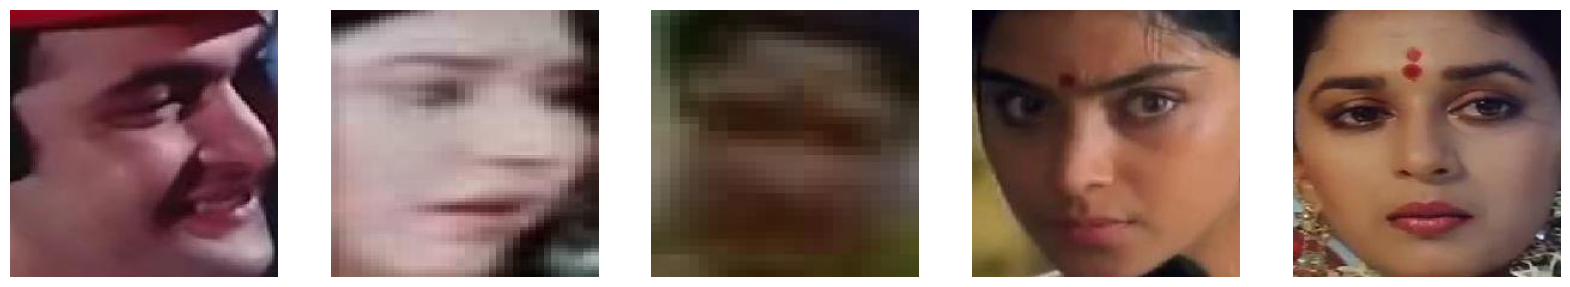

In [39]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(Xtest[i*400])
    ax[i].axis('off')

### Normalizing the test data

In [40]:
# minimum and maximum pixel values of images
Xtest.min(), Xtest.max()

(0, 255)

In [41]:
# normalizing the pixel values
Xtest = normalize_data(Xtest.copy())

In [42]:
# minimum and maximum pixel values of images after normalizing
Xtest.min(), Xtest.max()

(0, 1)

### Make predictions on the test dataset

In [44]:
# getting predictions in the form of class as well as probabilities
y_final_pred_prob = model.predict(Xtest)
predictions_final = np.where(y_final_pred_prob < 0.5, 0, 1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 259ms/step


In [45]:
# Save the predictions to a CSV file
data_test['class'] = predictions_final
data_test.to_csv('gender-classification_UddipanMitra_predictions.csv', index=False)

In [46]:
data_test['class'].value_counts()

0    4654
1     573
Name: class, dtype: int64